<a href="https://colab.research.google.com/github/riken-emar/MI-TDNMR/blob/main/ssnmf20230209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from scipy.fftpack import fft, ifft
import scipy.signal as sig
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import pandas as pd
from numpy.random import randn
import csv
import cmath
import math
import tkinter
from matplotlib.backends.backend_tkagg  import FigureCanvasTkAgg, NavigationToolbar2Tk
from tkinter import messagebox

import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!pip install git+https://github.com/keik/nmftools.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keik/nmftools.git to /tmp/pip-req-build-ss8gefex
  Running command git clone --filter=blob:none --quiet https://github.com/keik/nmftools.git /tmp/pip-req-build-ss8gefex
  Resolved https://github.com/keik/nmftools.git to commit b826448292026ba160773762092651a665e58898
  Preparing metadata (setup.py) ... done
  Created wheel for nmftools: filename=nmftools-0.0.1rc0-py3-none-any.whl size=2442 sha256=0db82f39ed27d5402dc6692295774f14919b28ba6a83cd581179974e1c2cce34
  Stored in directory: /tmp/pip-ephem-wheel-cache-0vrqcsr3/wheels/15/a3/d8/749a298833f1fb7baf1437b9071ec280fe7fd45a6a692620ff
Successfully built nmftools


In [5]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from nmftools import ssnmf ,nmf
import pandas as pd

In [7]:
df = pd.read_csv('preprocessedData-cpmg20230128py.csv', index_col=0)
df =df

rss = 0.07787971131646965
rss = 0.012855457609755783
rss = 0.006252056253293482
rss = 0.0035078973363415035
rss = 0.0030909604248111804
rss = 0.002920707778387416
rss = 0.002795804388129291
rss = 0.0027870909799682284
rss = 0.002678984833023318
rss = 0.0026305310085255624


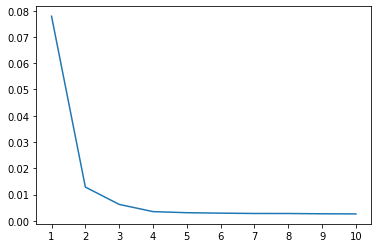

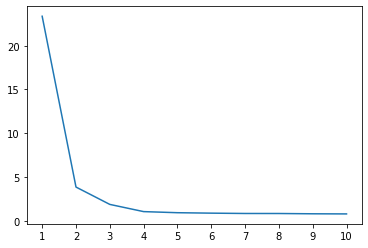

In [9]:
# 残差平方和(RSS)

# In[1]

import numpy as np

# 残差平方和(RSS)を定義
def rss(y, t):
    f = 0.5 * np.sum((y - t)**2) / y.shape[0]

    return f

import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('preprocessedData-cpmg20230128py.csv', index_col=0)
df=df
rssall=[]
costall=[]
k=10
for i in range(1,k+1):
 #out = ssnmf(df.values, R=i, n_iter=10000, F=df.values[:,-3:], init_G=[], init_H=[], init_U=[], verbose=False)
 out = nmf(df.values, R=i, n_iter=10000, init_H=[], init_U=[], verbose=False)
 resig1 = np.dot(out[0],out[1])
 #resig2 = np.dot(out[2],out[3])
 resig3 = resig1#+ resig2
 rss2 = rss(df.values, resig3)
 print("rss = {}".format(rss2))
 rssall.append(rss2)
 costall.append(out[2][-1])
rank=range(1,k+1)
plt.plot(rank,rssall)
plt.xticks(rank)
plt.show()
rssallout= pd.DataFrame(rssall)
rssallout.to_csv("rssallout_20230209nmf.csv")

plt.plot(rank,costall)
plt.xticks(rank)
plt.show()
costallout= pd.DataFrame(costall)
costallout.to_csv("costallout_20230209nmf.csv")

rss = 0.014756253864913974
rss = 0.009543555635028988
rss = 0.005022250996848362
rss = 0.003479916341324235
rss = 0.003036545049799576
rss = 0.0028353388630776824
rss = 0.0027664580325555675
rss = 0.0027178108411966082
rss = 0.0026644196327097022
rss = 0.002615501796576407


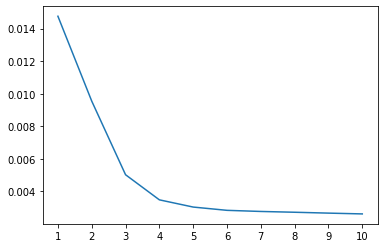

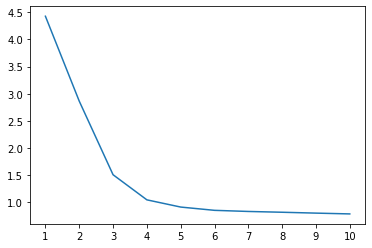

In [10]:
# 残差平方和(RSS)

# In[1]

import numpy as np

# 残差平方和(RSS)を定義
def rss(y, t):
    f = 0.5 * np.sum((y - t)**2) / y.shape[0]

    return f

import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('preprocessedData-cpmg20230128py.csv', index_col=0)
df=df
rssall=[]
costall=[]
k=10
for i in range(1,k+1):
 out = ssnmf(df.values, R=i, n_iter=10000, F=df.values[:,-1:], init_G=[], init_H=[], init_U=[], verbose=False)
 #out = nmf(df.values, R=i, n_iter=1000, init_H=[], init_U=[], verbose=False)
 resig1 = np.dot(out[0],out[1])
 resig2 = np.dot(out[2],out[3])
 resig3 = resig1+ resig2
 rss2 = rss(df.values, resig3)
 print("rss = {}".format(rss2))
 rssall.append(rss2)
 costall.append(out[4][-1])
rank=range(1,k+1)
plt.plot(rank,rssall)
plt.xticks(rank)
plt.show()
rssallout= pd.DataFrame(rssall)
rssallout.to_csv("rssallout_20230209ssnmf.csv")

plt.plot(rank,costall)
plt.xticks(rank)
plt.show()
costallout= pd.DataFrame(costall)
costallout.to_csv("costallout_20230209ssnmf.csv")

In [11]:
#out = nmf(df.values, R=10, n_iter=10000, init_H=[], init_U=[], verbose=False)

#out = ssnmf(df.values, R=8, n_iter=10000, F=df.values[:,-1:], init_G=[], init_H=[], init_U=[], verbose=True)
#out = ssnmf(df.values, R=20, n_iter=10000, F=df.values[:,-1:], init_G=out1[1], init_H=out1[2], init_U=out1[3], verbose=False)

n=6
out = ssnmf(df.values, R=n, n_iter=10000, F=df.values[:,-1:], init_G=[], init_H=[], init_U=[], verbose=True)
#out = ssnmf(df.values, R=n, n_iter=10000, F=df.values[:,-1:], init_G=out[1], init_H=out[2], init_U=out[3], verbose=True)

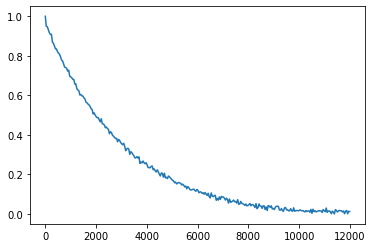

In [12]:
plt.plot(df.iloc[:,-1:])
#plt.plot(df.iloc[:,118:120])
plt.show()

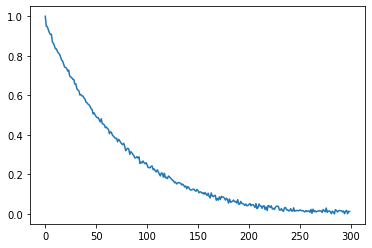

In [13]:
for i in range(len(out[0].T)):
 plt.plot(out[0].T[i])
 plt.show()

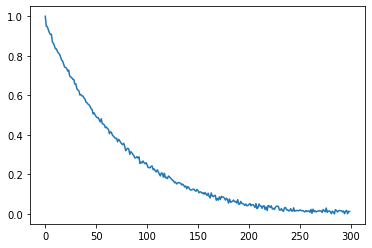

In [14]:
plt.plot(out[0])
plt.show()

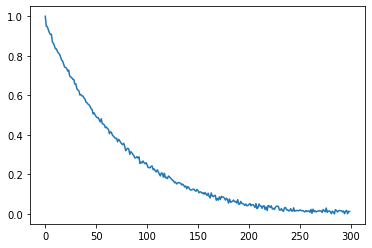

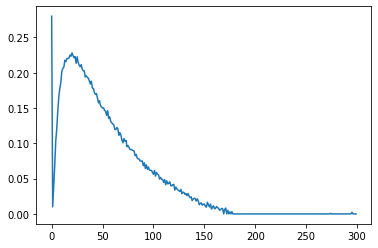

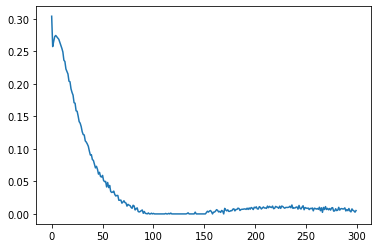

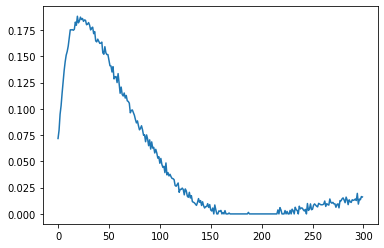

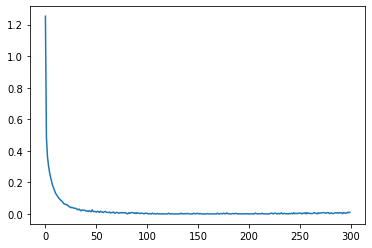

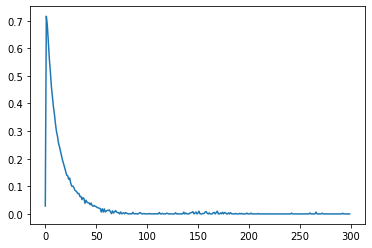

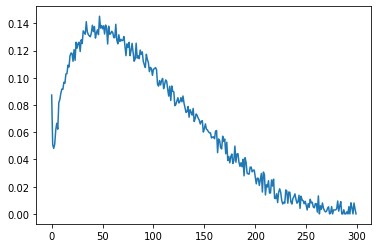

In [15]:
plt.plot(out[0])
plt.show()
for i in range(len(out[2].T)):
 plt.plot(out[2].T[i])
 plt.show()

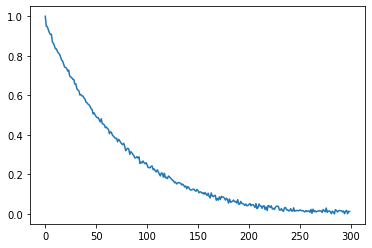

In [16]:
plt.plot(out[0])
plt.show()

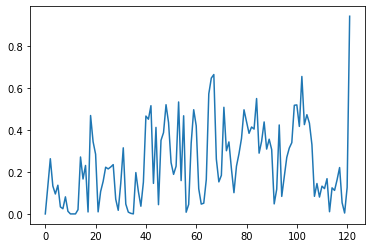

In [17]:
for i in range(len(out[1])):
 plt.plot(out[1][i])
 plt.show()

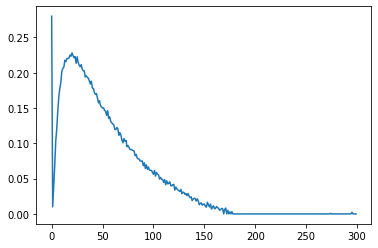

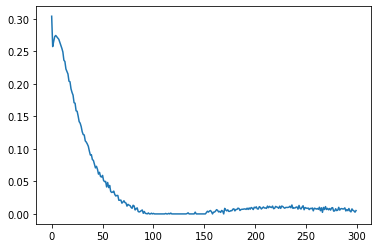

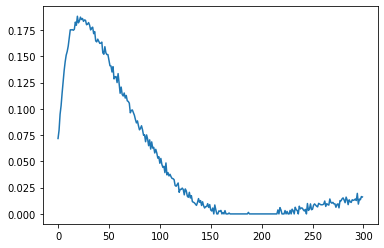

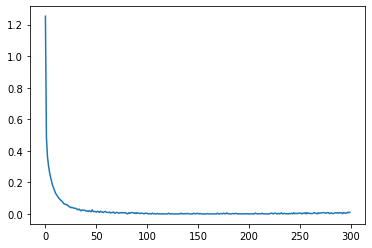

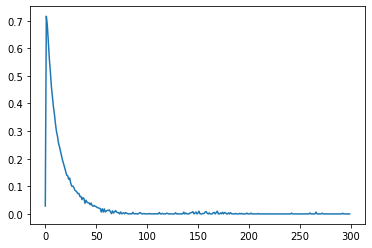

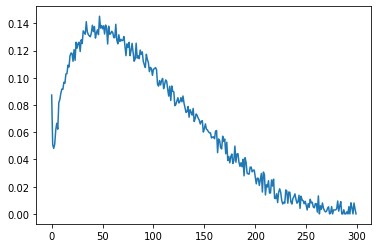

In [18]:
for i in range(len(out[2].T)):
 plt.plot(out[2].T[i])
 plt.show()
#plt.plot(out[2].T[0]+out[2].T[1])
#plt.show()

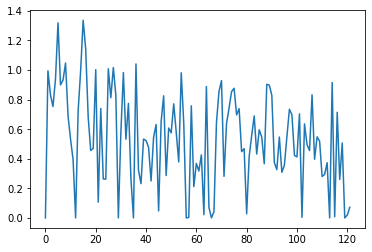

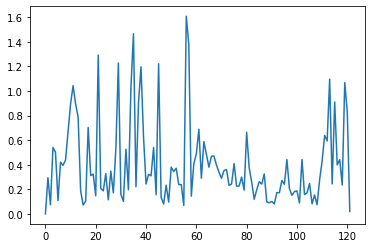

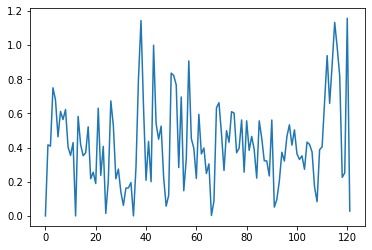

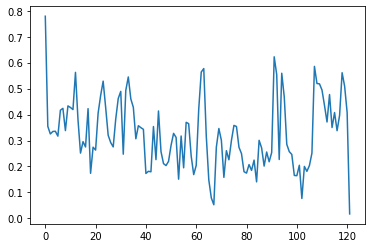

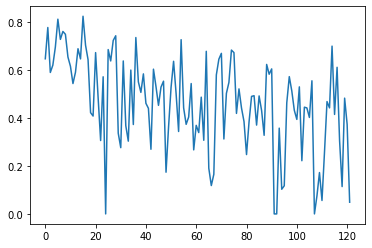

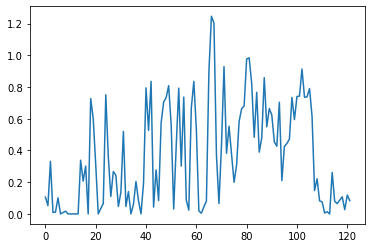

In [19]:
for i in range(len(out[3])):
 plt.plot(out[3][i])
 plt.show()

In [20]:
print(out[3])

[[3.50116732e-35 9.94836286e-01 8.33494260e-01 7.53172974e-01
  9.37358006e-01 1.31962179e+00 8.99720967e-01 9.32266874e-01
  1.04721858e+00 6.88281002e-01 5.30838367e-01 3.93805045e-01
  7.15776294e-44 7.21787123e-01 9.94830370e-01 1.33673399e+00
  1.14437545e+00 6.83762667e-01 4.56137932e-01 4.70198862e-01
  1.00246636e+00 1.06554110e-01 7.40190254e-01 2.63447086e-01
  2.62073014e-01 1.00863466e+00 8.12965499e-01 1.01711550e+00
  8.28334753e-01 1.85339892e-06 5.79392849e-01 9.83219303e-01
  5.31898927e-01 7.74156139e-01 2.64022334e-01 3.63483568e-08
  1.04124658e+00 3.21355977e-01 2.31862869e-01 5.33046558e-01
  5.22804252e-01 4.78168619e-01 2.49674360e-01 5.45006720e-01
  6.31405266e-01 4.74184738e-02 6.51451956e-01 8.25952378e-01
  2.86857519e-01 6.07787389e-01 5.75425199e-01 7.71496369e-01
  5.80224099e-01 3.78431667e-01 9.81378632e-01 6.39887879e-01
  3.41873646e-08 3.30233136e-03 7.58054275e-01 2.11454191e-01
  3.68383145e-01 3.17379932e-01 4.26500047e-01 2.15775318e-02
  8.8816

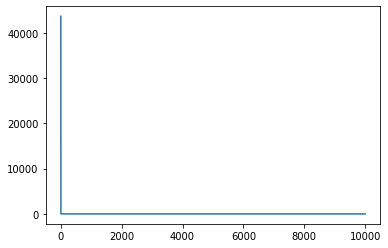

In [21]:
plt.plot(out[4])
plt.show()

In [22]:
import numpy as np
resig1 = np.dot(out[0],out[1])#+np.dot(out[2],out[3])

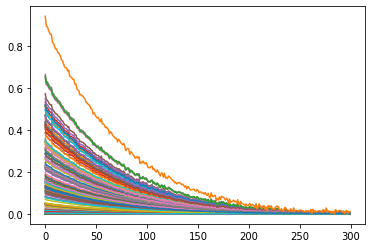

In [23]:
plt.plot(resig1)

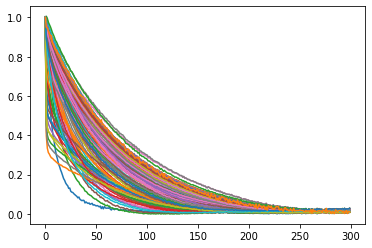

In [24]:
resig22 = np.dot(out[2],out[3])
resig3 = resig1+ resig22
plt.plot(resig3)

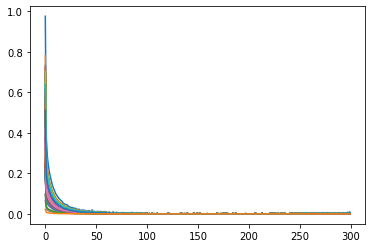

In [25]:
#resig2 = np.dot(out[2],out[3])
k=3
comp1=out[3].copy()
comp2=out[3].copy()
comp1[:,:] = 0
comp1[k,:] = comp2[k,:]
resig2 = np.dot(out[2],comp1)
plt.plot(resig2)


0


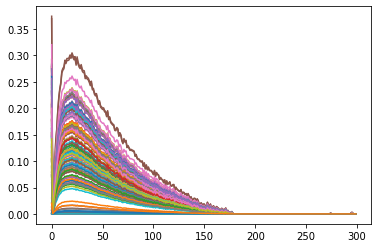

1


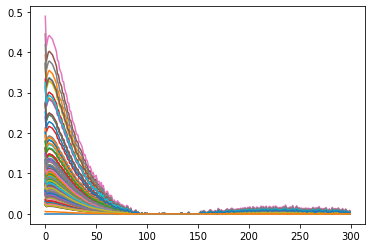

2


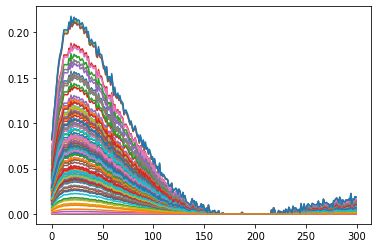

3


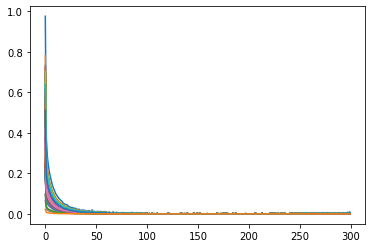

4


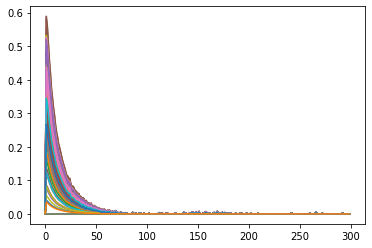

5


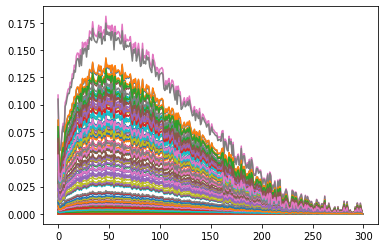

6


IndexError: ignored

In [26]:
#n=8
#out = ssnmf(df.values, R=n, n_iter=10000, F=df.values[:,-1:], init_G=[], init_H=[], init_U=[], verbose=True)
#out = ssnmf(df.values, R=n, n_iter=10000, F=df.values[:,-1:], init_G=out[1], init_H=out[2], init_U=out[3], verbose=True)

k=0
print(k)
comp1=out[3].copy()
comp2=out[3].copy()
comp1[:,:] = 0
comp1[k,:] = comp2[k,:]
resigcomp0 = np.dot(out[2],comp1)
plt.plot(resigcomp0)
plt.show()

k=1
print(k)
comp1=out[3].copy()
comp2=out[3].copy()
comp1[:,:] = 0
comp1[k,:] = comp2[k,:]
resigcomp1 = np.dot(out[2],comp1)
plt.plot(resigcomp1)
plt.show()
k=2
print(k)
comp1=out[3].copy()
comp2=out[3].copy()
comp1[:,:] = 0
comp1[k,:] = comp2[k,:]
resigcomp2 = np.dot(out[2],comp1)
plt.plot(resigcomp2)
plt.show()
k=3
print(k)
comp1=out[3].copy()
comp2=out[3].copy()
comp1[:,:] = 0
comp1[k,:] = comp2[k,:]
resigcomp3 = np.dot(out[2],comp1)
plt.plot(resigcomp3)
plt.show()
k=4
print(k)
comp1=out[3].copy()
comp2=out[3].copy()
comp1[:,:] = 0
comp1[k,:] = comp2[k,:]
resigcomp4 = np.dot(out[2],comp1)
plt.plot(resigcomp4)
plt.show()
k=5
print(k)
comp1=out[3].copy()
comp2=out[3].copy()
comp1[:,:] = 0
comp1[k,:] = comp2[k,:]
resigcomp5 = np.dot(out[2],comp1)
plt.plot(resigcomp5)
plt.show()
k=6
print(k)
comp1=out[3].copy()
comp2=out[3].copy()
comp1[:,:] = 0
comp1[k,:] = comp2[k,:]
resigcomp6 = np.dot(out[2],comp1)
plt.plot(resigcomp6)
plt.show()

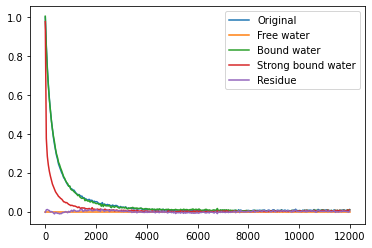

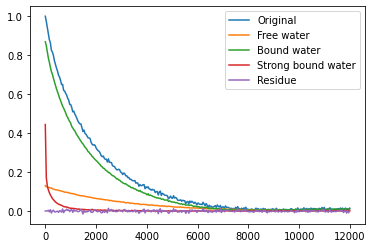

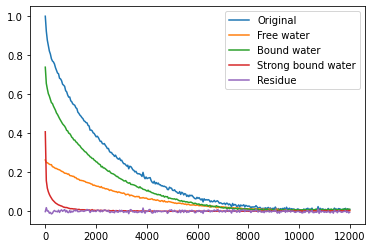

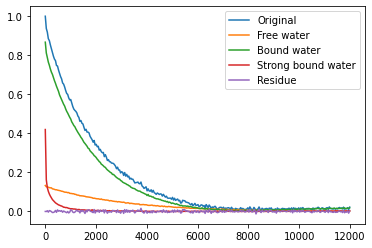

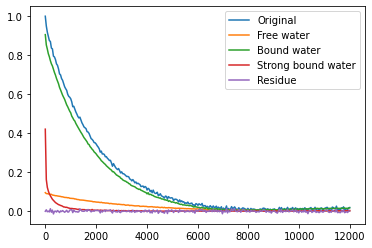

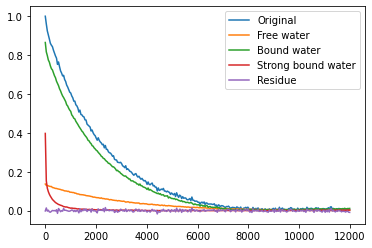

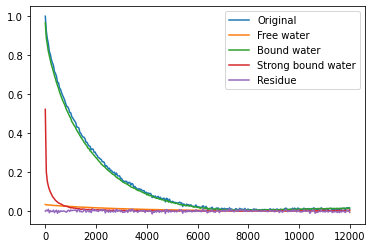

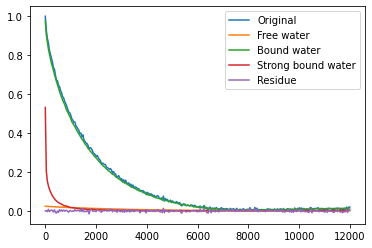

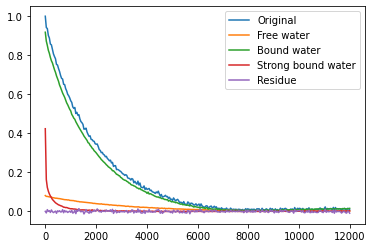

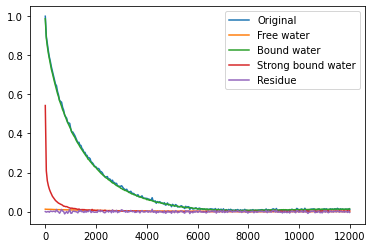

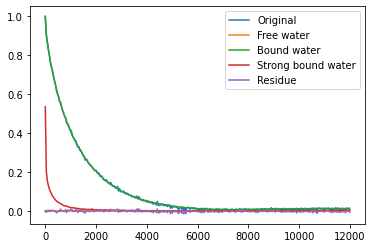

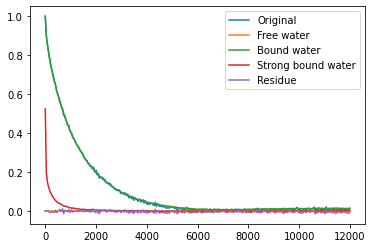

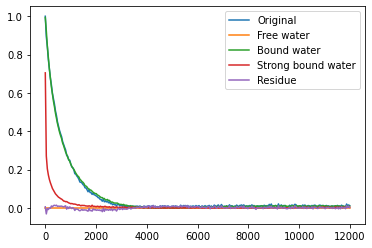

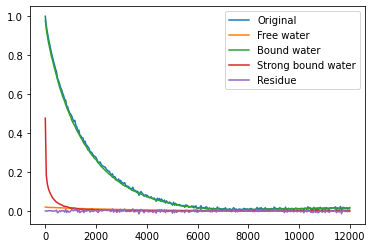

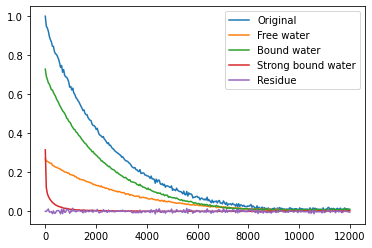

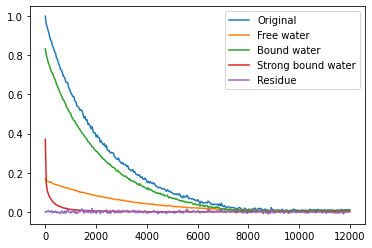

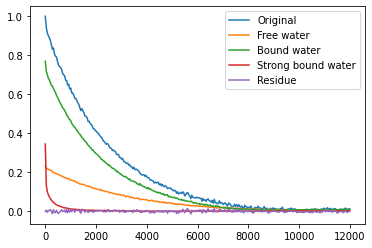

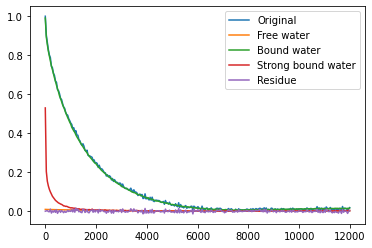

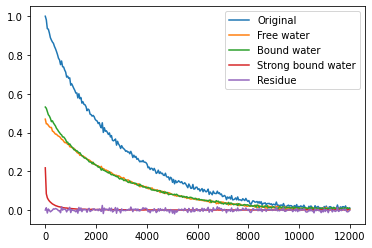

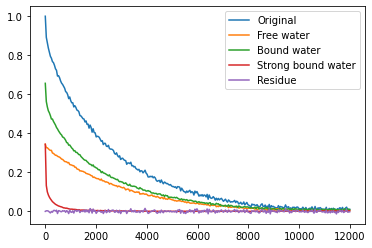

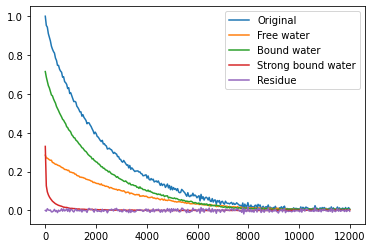

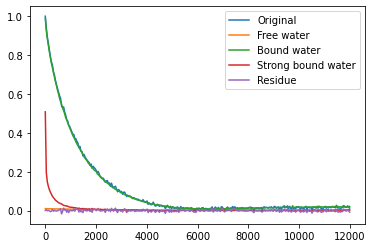

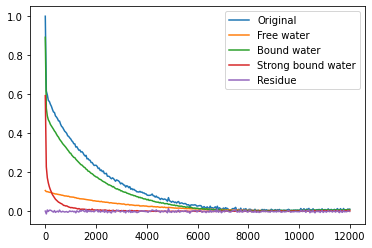

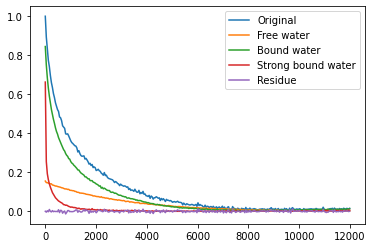

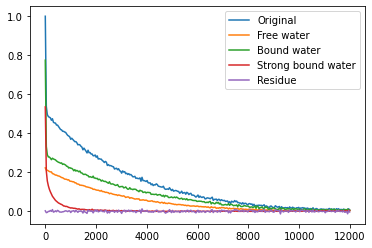

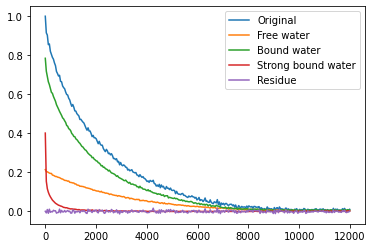

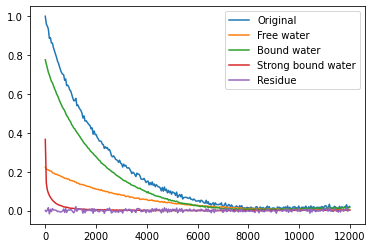

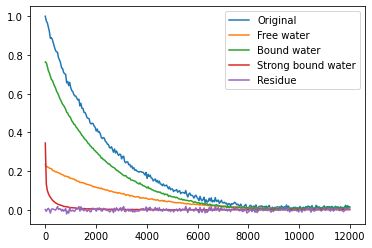

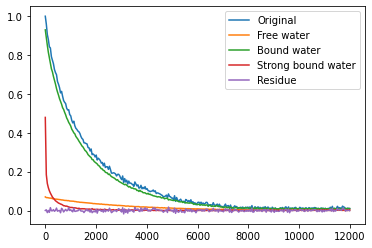

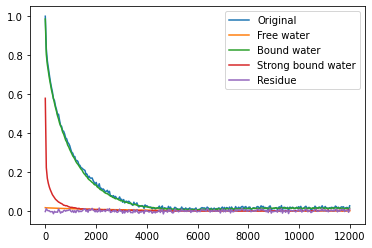

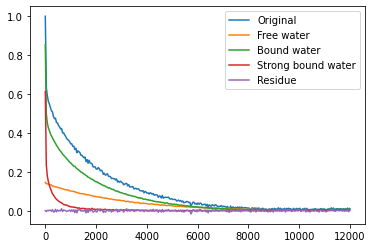

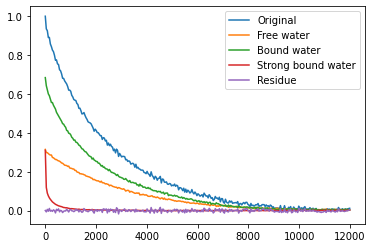

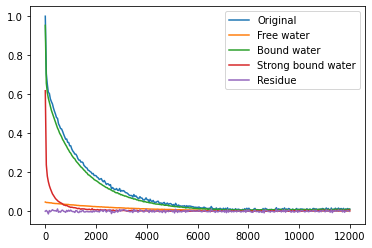

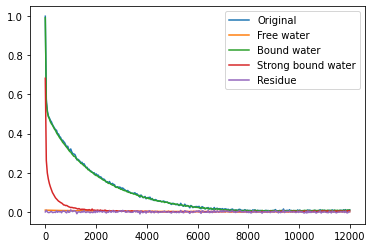

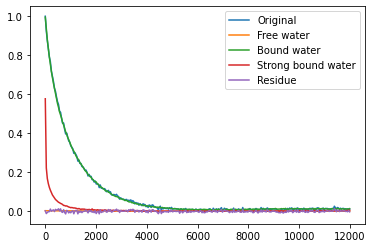

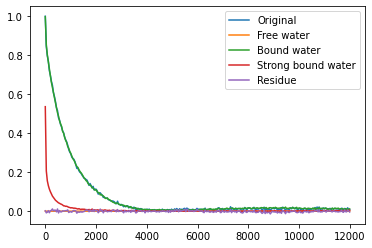

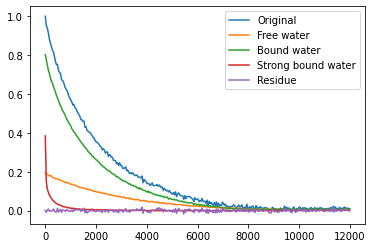

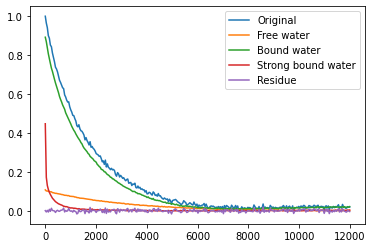

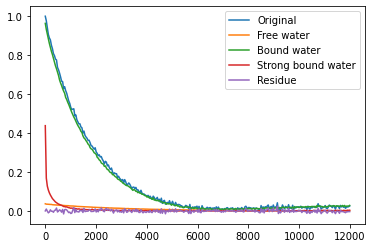

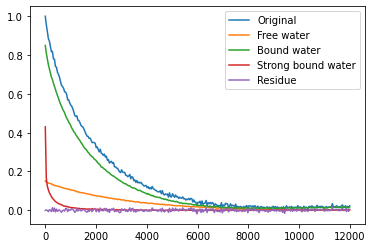

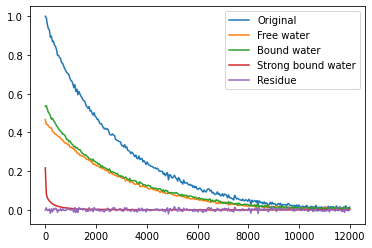

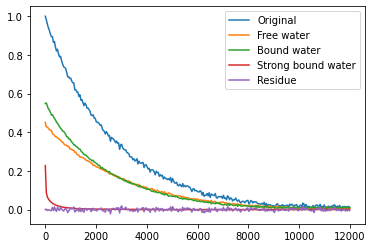

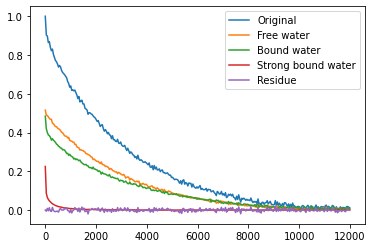

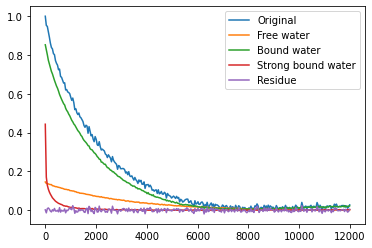

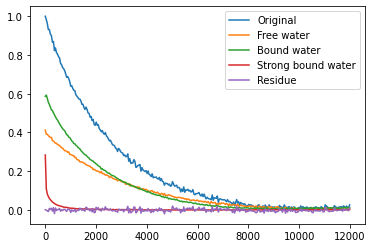

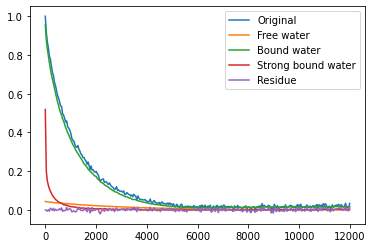

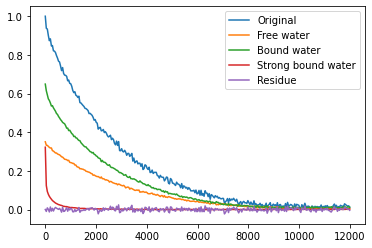

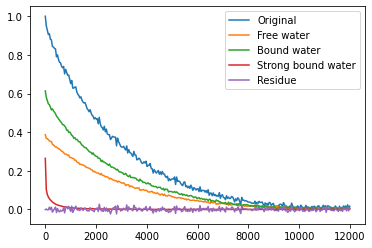

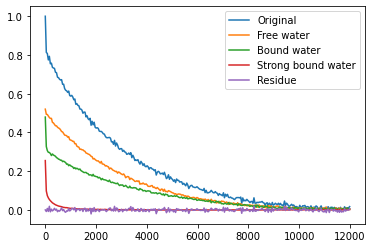

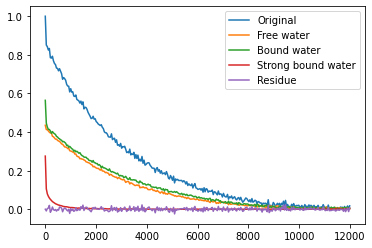

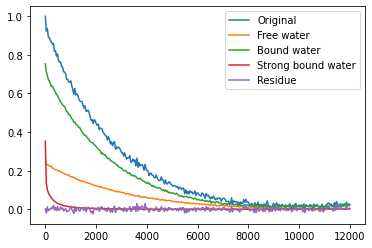

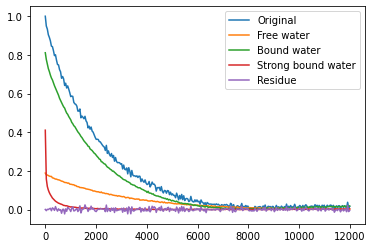

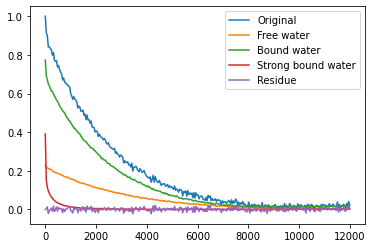

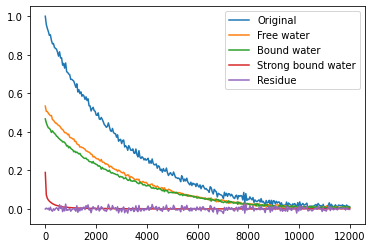

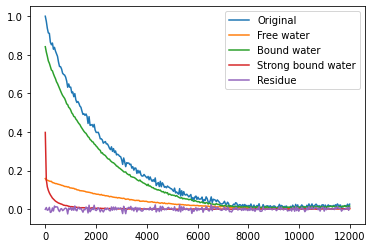

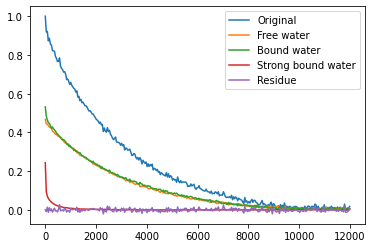

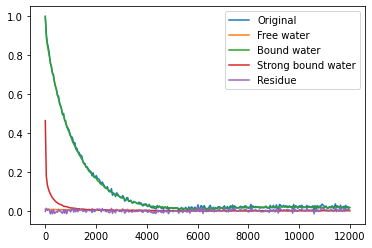

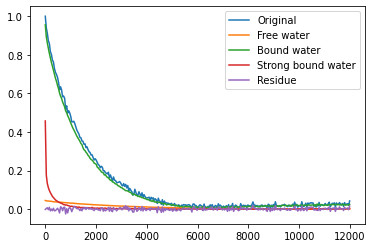

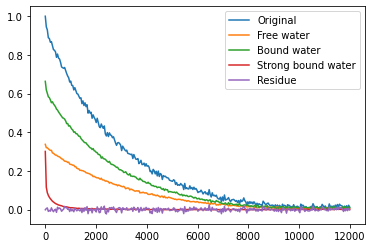

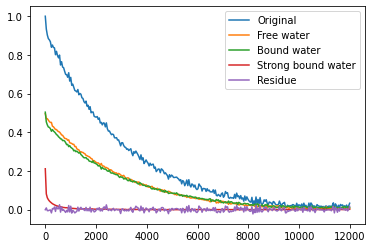

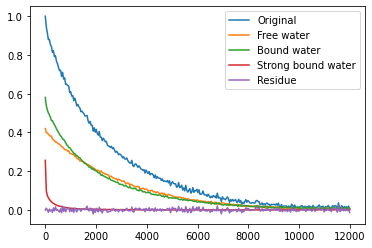

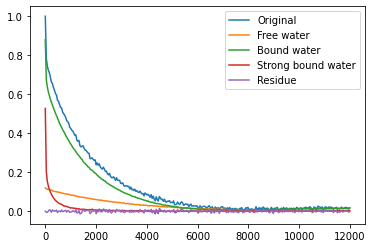

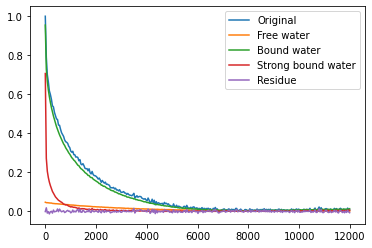

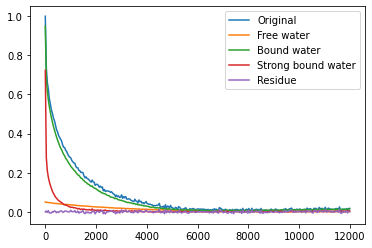

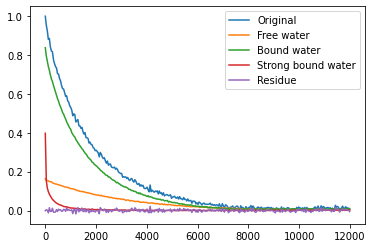

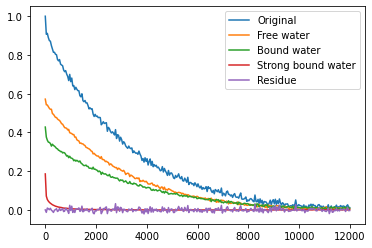

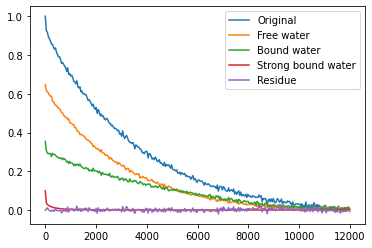

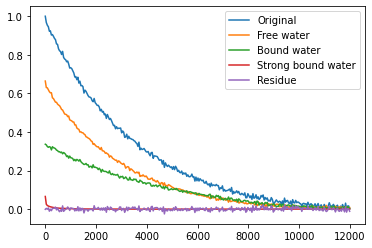

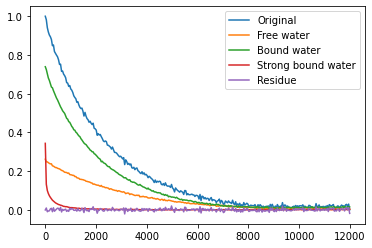

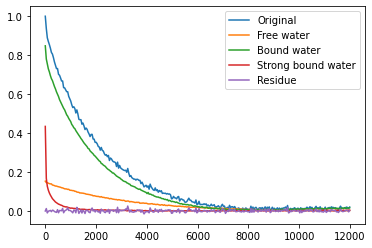

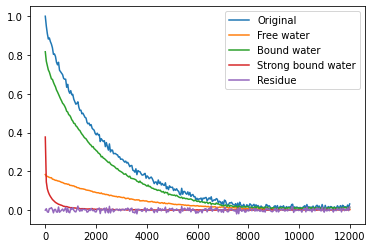

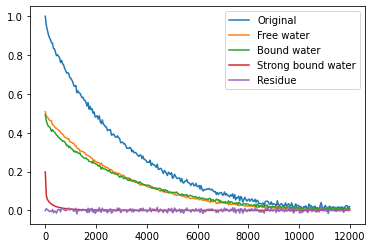

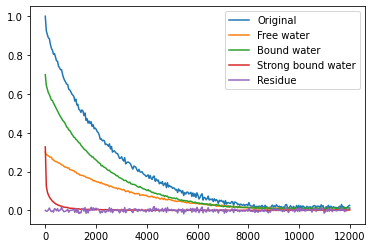

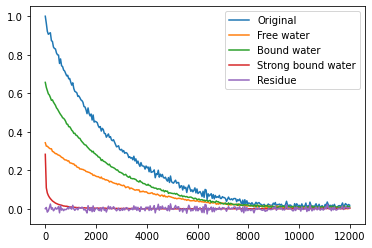

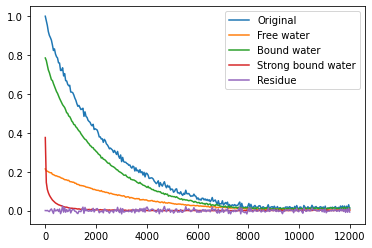

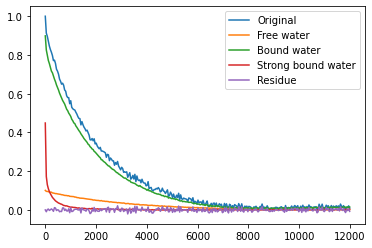

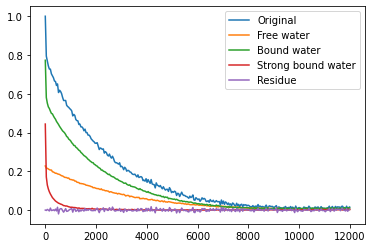

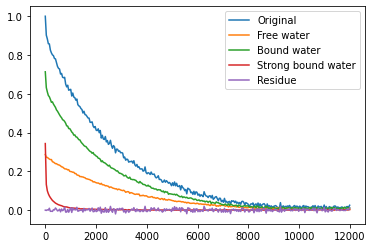

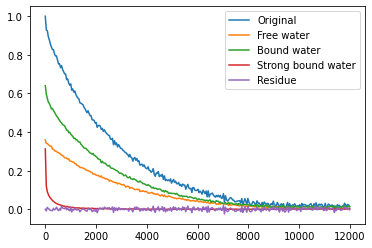

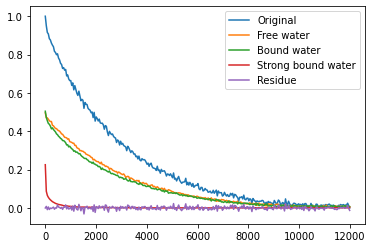

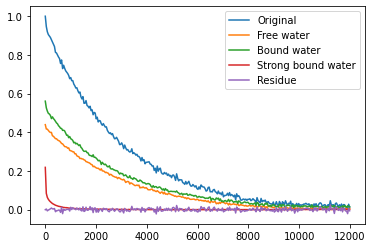

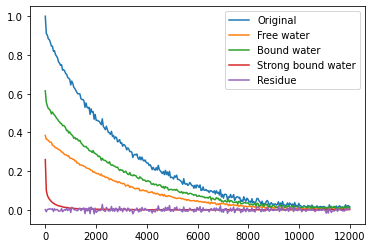

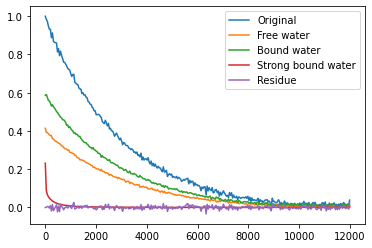

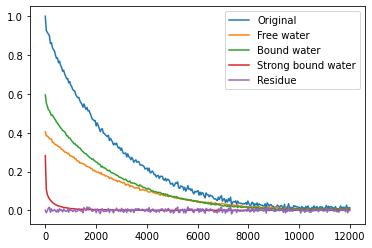

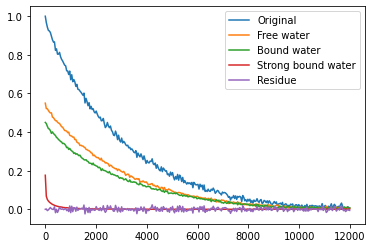

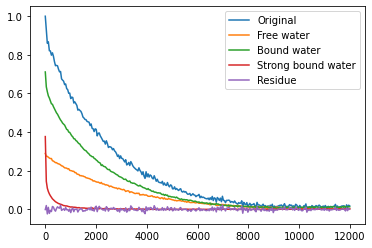

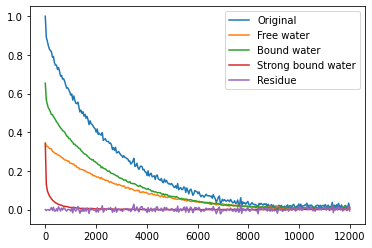

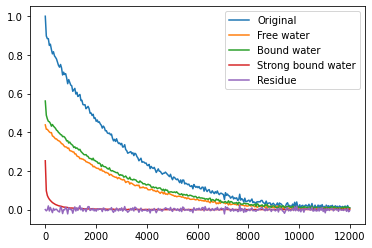

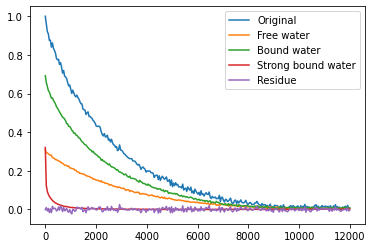

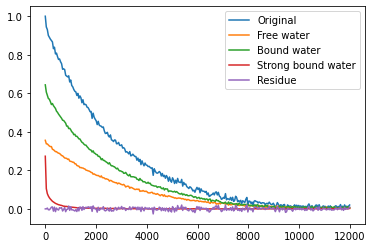

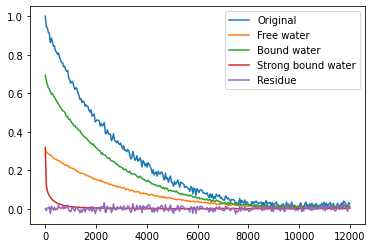

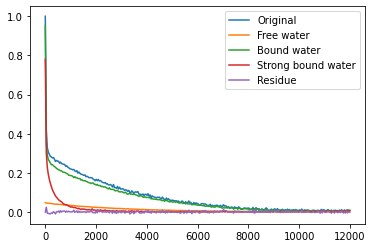

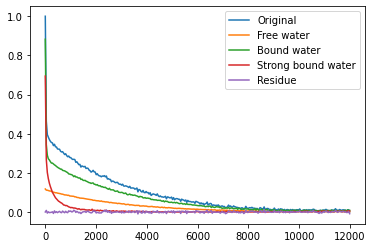

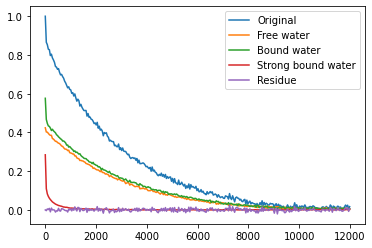

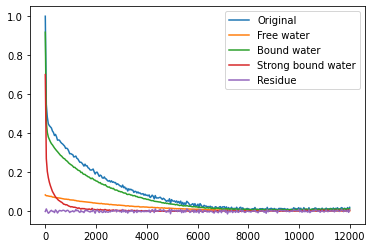

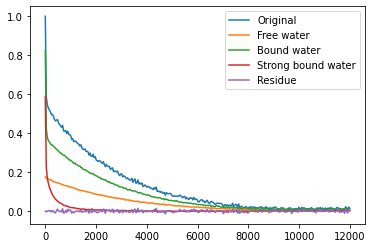

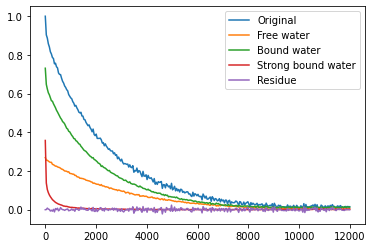

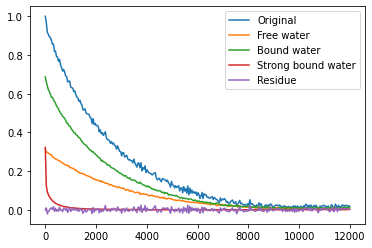

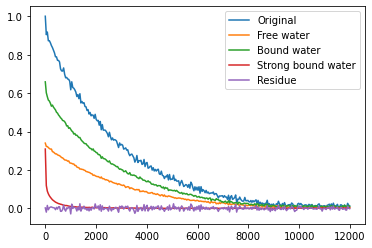

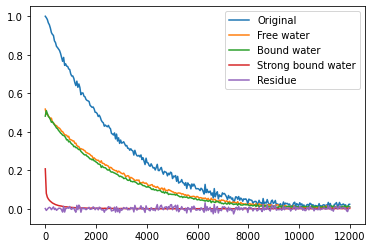

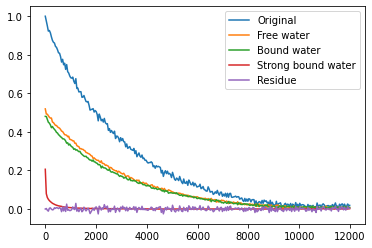

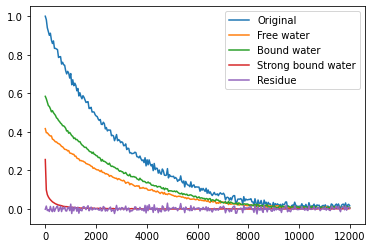

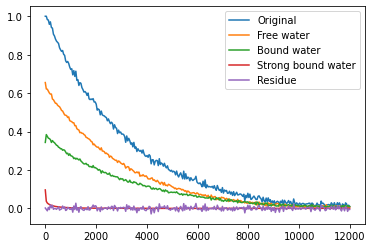

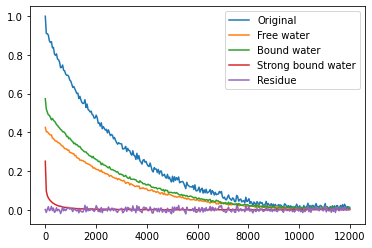

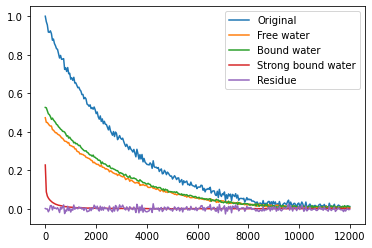

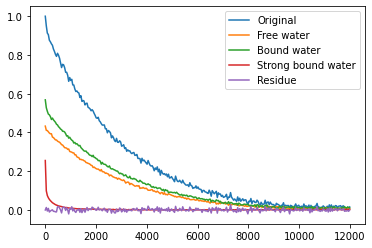

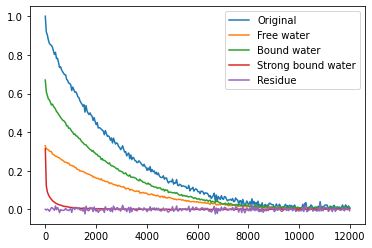

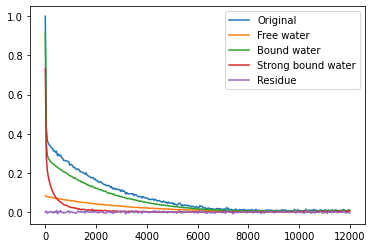

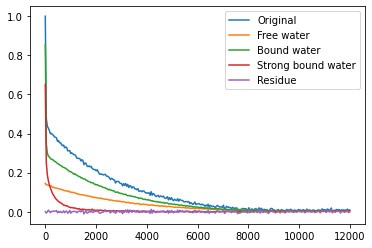

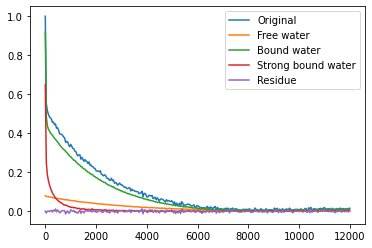

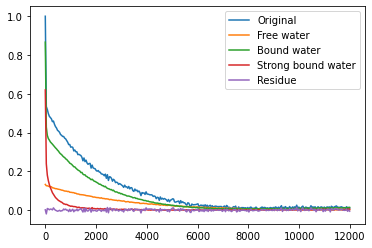

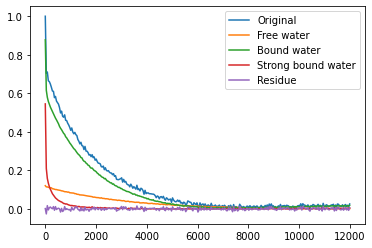

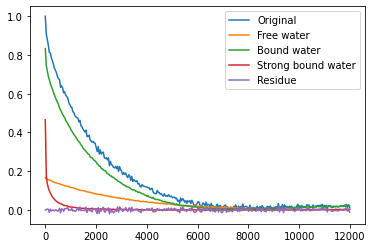

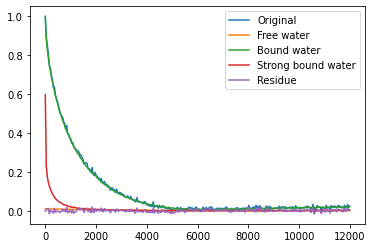

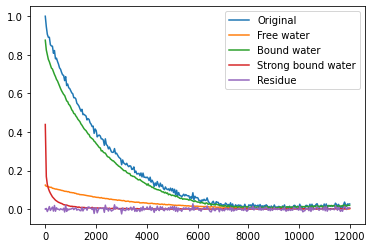

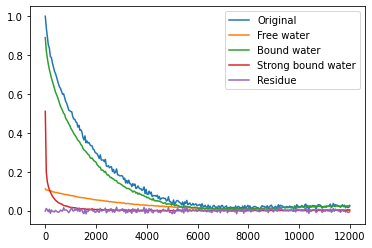

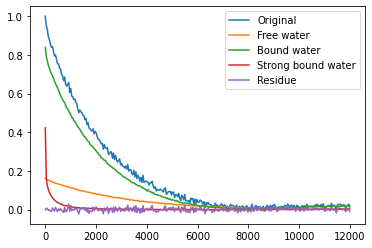

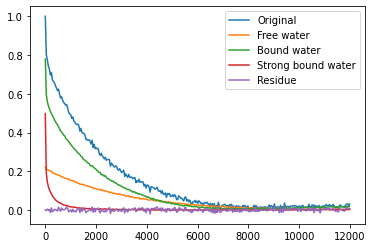

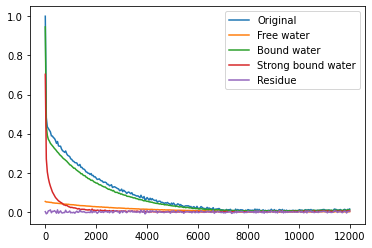

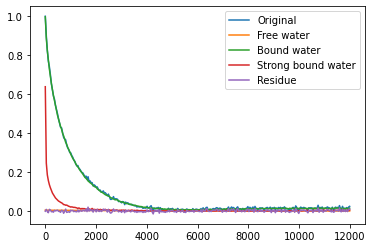

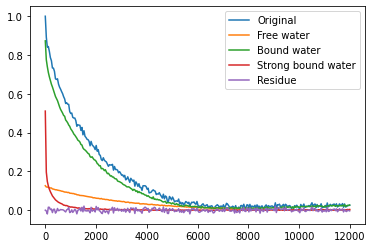

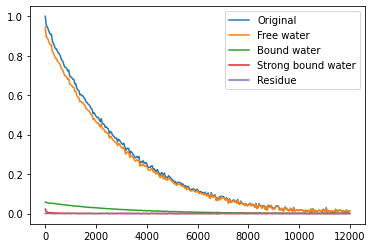

In [27]:
resig1 = np.dot(out[0],out[1])
resigcomp555=resigcomp0+resigcomp1+resigcomp2+resigcomp3+resigcomp4+resigcomp5#+resigcomp6#+resigcomp7#+resigcomp8#+resigcomp9#+resigcomp10+resigcomp11+resigcomp12+resigcomp13+resigcomp14+resigcomp15+resigcomp16+resigcomp17+resigcomp18+resigcomp19
resigcomp333=resigcomp0+resigcomp1+resigcomp2+resigcomp4+resigcomp5#+resigcomp6#+resigcomp7#+resigcomp9#+resigcomp10+resigcomp11+resigcomp12+resigcomp13+resigcomp14+resigcomp15+resigcomp16+resigcomp17+resigcomp0+resigcomp19
resigcomp33344=resigcomp3
resigcomp3333=df.values-resig1-resigcomp333#resigcomp0+resigcomp2+resigcomp1+resigcomp3+resigcomp5+resigcomp6+resigcomp7+resigcomp9+resigcomp8
resigcomp9999=df.values-resig1-resigcomp555#resigcomp0+resigcomp2+resigcomp1+resigcomp3+resigcomp5+resigcomp6+resigcomp7+resigcomp9+resigcomp8
for i in range(len(df.values[0,:])):
 plt.plot(df.index,df.values[:,i], label="Original")
 plt.plot(df.index,resig1[:,i], label="Free water")
 plt.plot(df.index,resigcomp555[:,i], label="Bound water")
 #plt.plot(df.index,resigcomp333[:,i], label="Weakly bound water")
 plt.plot(df.index,resigcomp33344[:,i], label="Strong bound water")
 #plt.plot(df.index,resigcomp3333[:,i], label="Comp3")
 plt.plot(df.index,resigcomp9999[:,i], label="Residue")
 plt.legend()
 plt.show()

In [28]:
dfresig1= pd.DataFrame(resig1)
dfresig1.to_csv("resig1_20230209.csv")
resigcomp555= pd.DataFrame(resigcomp555)
resigcomp555.to_csv("boundwater_20230209.csv")
resigcomp333= pd.DataFrame(resigcomp333)
resigcomp333.to_csv("weaklyboundwater_20230209.csv")
resigcomp33344= pd.DataFrame(resigcomp33344)
resigcomp33344.to_csv("stronglyboundwater_20230209.csv")
resigcomp3333= pd.DataFrame(resigcomp3333)
resigcomp3333.to_csv("restronglyboundwater_20230209.csv")
resigcomp9999= pd.DataFrame(resigcomp9999)
resigcomp9999.to_csv("residue_20230209.csv")

In [31]:
dfresig1= pd.DataFrame(resig1)
dfresig1.to_csv("resig1_20230209.csv")

In [32]:
resig2 = np.dot(out[2],out[3])
dfresig2= pd.DataFrame(resig2)
dfresig2.to_csv("resig2_20230209.csv")

In [33]:
dfout0= pd.DataFrame(out[0])
dfout0.to_csv("out0_20230209.csv")

In [34]:
dfout1= pd.DataFrame(out[1])
dfout1.to_csv("out1_20230209.csv")

In [35]:
dfout2= pd.DataFrame(out[2])
dfout2.to_csv("out2_20230209.csv")

In [36]:
dfout3= pd.DataFrame(out[3])
dfout3.to_csv("out3_20230209.csv")

In [37]:
dfout4= pd.DataFrame(out[4])
dfout4.to_csv("out4_20230209.csv")